In [2]:
cd D:\SM\doit\COURSES\Python for Financial Analysis and Algorithmic Trading\2. Course Materials and Set-up\1.3 Python-for-Finance-Repo-master\Python-for-Finance-Repo-master\09-Python-Finance-Fundamentals

D:\SM\doit\COURSES\Python for Financial Analysis and Algorithmic Trading\2. Course Materials and Set-up\1.3 Python-for-Finance-Repo-master\Python-for-Finance-Repo-master\09-Python-Finance-Fundamentals


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
aapl = pd.read_csv('AAPL_CLOSE', index_col = 'Date', parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE', index_col='Date' ,parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE', index_col = 'Date', parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE', index_col = 'Date', parse_dates=True)

In [13]:
stocks = pd.concat([aapl, cisco, ibm, amzn], axis=1)
stocks.columns = ['Apple', 'Cisco', 'IBM', 'Amazon']

In [14]:
stocks.head()

,Apple,Cisco,IBM,Amazon
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


In [15]:
stocks.pct_change(1).mean()

Apple     0.000750
Cisco     0.000599
IBM       0.000081
Amazon    0.001328
dtype: float64

In [18]:
stocks.pct_change(1).corr()

,Apple,Cisco,IBM,Amazon
Apple,1.000000,0.301990,0.297498,0.235487
Cisco,0.301990,1.000000,0.424672,0.284470
IBM,0.297498,0.424672,1.000000,0.258492
Amazon,0.235487,0.284470,0.258492,1.000000


In [20]:
log_ret = np.log(stocks/stocks.shift(1))

In [21]:
log_ret.head()

,Apple,Cisco,IBM,Amazon
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


In [22]:
log_ret.mean()

Apple     0.000614
Cisco     0.000497
IBM       0.000011
Amazon    0.001139
dtype: float64

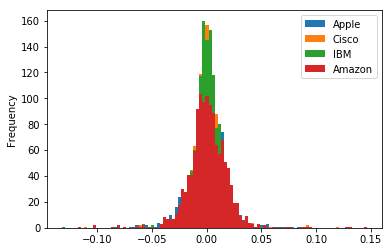

In [26]:
log_ret.plot(kind='hist', bins = 100)

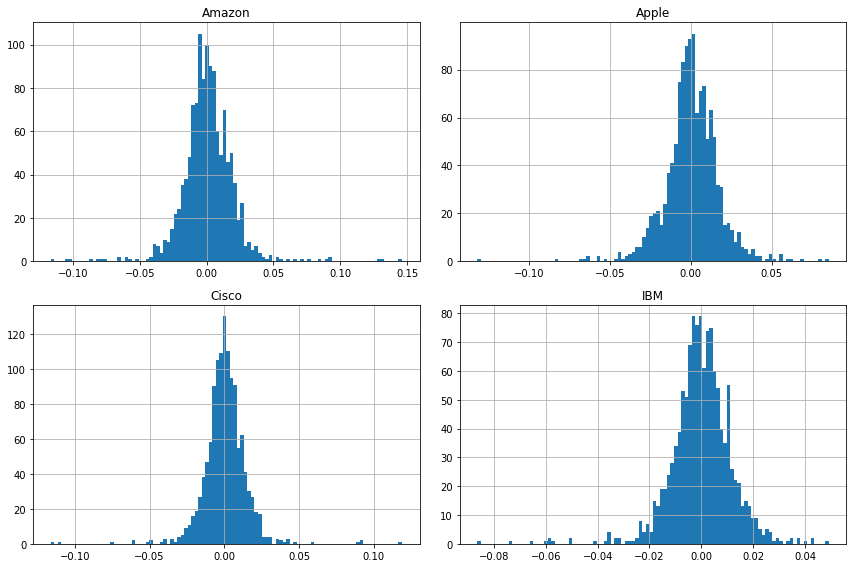

In [27]:
log_ret.hist(bins=100, figsize=(12,8))
plt.tight_layout()

In [28]:
log_ret.cov()*252

,Apple,Cisco,IBM,Amazon
Apple,0.068326,0.017854,0.014464,0.018986
Cisco,0.017854,0.051381,0.018029,0.019956
IBM,0.014464,0.018029,0.035203,0.014939
Amazon,0.018986,0.019956,0.014939,0.094470


In [44]:
np.random.seed(101)
weights = np.random.random(4)
bal_wt = weights/np.sum(weights)
exp_ret = np.dot(bal_wt, log_ret.mean()*252)
exp_vol = np.sqrt(np.dot(bal_wt.T, np.dot(log_ret.cov(), bal_wt)*252))
sharpe_ratio = exp_ret/exp_vol
print('Balanced Weights:', bal_wt)
print('Expected Returns:', exp_ret)
print('Expected Volatility', exp_vol)
print('Sharpe Ratio',sharpe_ratio)

Balanced Weights: [0.40122278 0.44338777 0.02212343 0.13326603]
Expected Returns: 0.15599272049632001
Expected Volatility 0.18502649565909488
Sharpe Ratio 0.8430831483926031


In [50]:
log_ret.cov()

,Apple,Cisco,IBM,Amazon
Apple,0.000271,0.000071,0.000057,0.000075
Cisco,0.000071,0.000204,0.000072,0.000079
IBM,0.000057,0.000072,0.000140,0.000059
Amazon,0.000075,0.000079,0.000059,0.000375


In [56]:
np.random.seed(101)
no_port = 5000
wt = np.zeros((no_port, len(stocks.columns)))
ret_arr = np.zeros(no_port)
vol_arr = np.zeros(no_port)
sharpe_ratio = np.zeros(no_port)
for ind in range(no_port):
    weights = np.random.random(len(stocks.columns))
    weights = weights/np.sum(weights)
    #saving weights 
    wt[ind, :] = weights
    ret_arr[ind] = np.dot(weights, log_ret.mean()*252)
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    sharpe_ratio[ind] = ret_arr[ind]/vol_arr[ind]
    

In [63]:
sharpe_ratio.max()

1.0303260551271067

In [58]:
sharpe_ratio.argmax()

1420

In [60]:
wt[1420,:]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

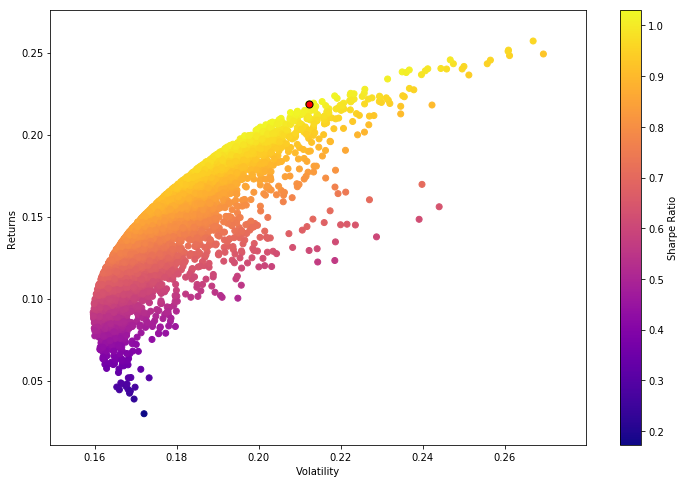

In [70]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c = sharpe_ratio, cmap = 'plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.scatter(vol_arr[1420], ret_arr[1420], c='red', s = 50, edgecolors='black')

In [71]:
from scipy.optimize import minimize

In [72]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

In [83]:
def ret_vol_sr(weights):
    weights = np.array(weights)
    exp_ret = np.dot(weights, log_ret.mean()*252)
    exp_vol = np.sqrt(np.dot(weights.T, np.dot(weights, log_ret.cov()*252)))
    sr = exp_ret/exp_vol
    return  np.array([exp_ret, exp_vol, sr])

In [84]:
def neg_sr(weights):
    return ret_vol_sr(weights)[2]*-1

In [85]:
def check_sum(weights):
    return np.sum(weights) - 1

In [100]:
inital_guess = [0.25,0.25,0.25,0.25]

In [87]:
bounds = ((0,1),(0,1),(0,1),(0,1))

In [88]:
cons = ({'type':'eq', 'fun':check_sum})

In [89]:
opt_res = minimize(neg_sr, inital_guess, bounds=bounds, constraints=cons, method='SLSQP')

In [90]:
opt_res

     fun: -1.0307168703354792
     jac: array([ 5.64306974e-05,  4.18573618e-05,  3.39921713e-01, -4.44948673e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([2.66289767e-01, 2.04189825e-01, 7.81438716e-17, 5.29520408e-01])

In [91]:
opt_res.x

array([2.66289767e-01, 2.04189825e-01, 7.81438716e-17, 5.29520408e-01])

In [92]:
ret_vol_sr(opt_res.x)

array([0.21885915, 0.21233683, 1.03071687])

In [93]:
frontier_y = np.linspace(0,0.3,100)

In [98]:
def minimize_volatility(weights):
    return ret_vol_sr(weights)[1]

In [102]:
frontier_volatility = []
for possible_return in frontier_y:
    conss = ({'type':'eq', 'fun':check_sum},
           {'type':'eq', 'fun':lambda w:ret_vol_sr(w)[0] - possible_return})
    result = minimize(minimize_volatility, inital_guess, bounds=bounds, constraints=conss, method = 'SLSQP')
    frontier_volatility.append(result.fun)

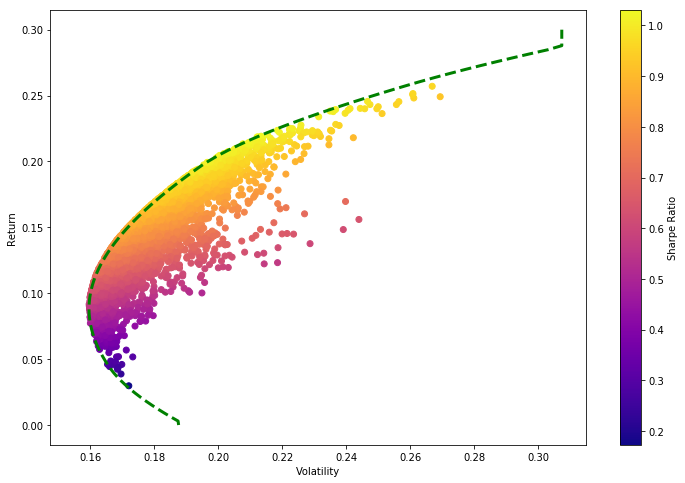

In [103]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_ratio, cmap = 'plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_volatility,frontier_y, 'g--', linewidth = 3)

In [106]:
#Everything can change in future, but based on historical data the above plot is apt for given volatility, you can also decide 
#allocation for the given portfolio

In [2]:
from scipy import stats

In [3]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.
        If only x is given (and y=None), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.
    
    Returns
    -------
    slope : float
        slope of the regression line
    intercept : float
        intercept of the regression line
    rvalue : float
        correlation coefficient
    pvalue : float
        two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, using Wald Test with t-distribution of
        the test statistic.
    stderr : float
        Standard error of the estimated gradient.
    
  

In [4]:
import pandas as pd
import pandas_datareader as web

In [8]:
spy_etf = web.DataReader('SPY', 'yahoo',start, end)

In [9]:
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,92.246048
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,92.490204
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,92.555328
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,92.946060
2010-01-08,114.620003,113.660004,113.889999,114.570000,126402800.0,93.255348


In [10]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2017-07-25')
aapl = web.DataReader('aapl', 'yahoo',start, end)

In [11]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.466835
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.512596
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.090879
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.042646
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.215786


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

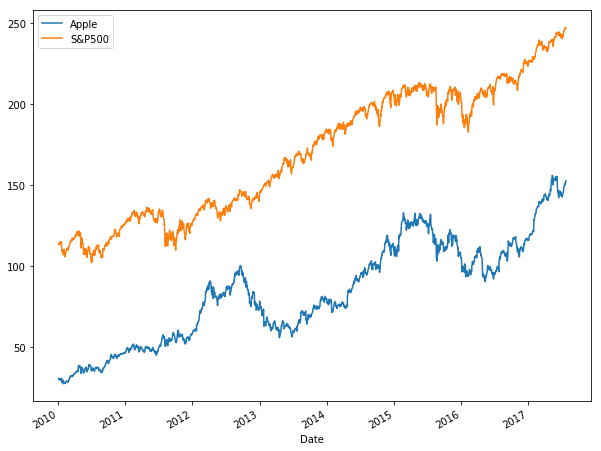

In [13]:
aapl['Close'].plot(label = 'Apple', figsize = (10,8))
spy_etf['Close'].plot(label = 'S&P500')
plt.legend()

In [14]:
aapl['Cumulative Return'] = aapl['Close']/aapl['Close'][0]
spy_etf['Cumulative Return'] = spy_etf['Close']/spy_etf['Close'][0]

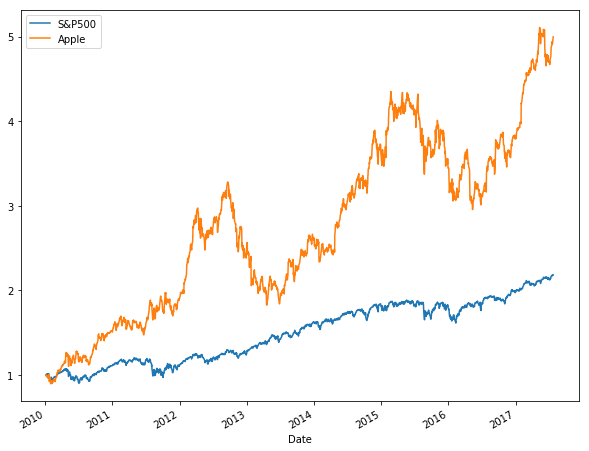

In [15]:
spy_etf['Cumulative Return'].plot(label = 'S&P500')
aapl['Cumulative Return'].plot(label = 'Apple', figsize = (10,8))
plt.legend()

In [16]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

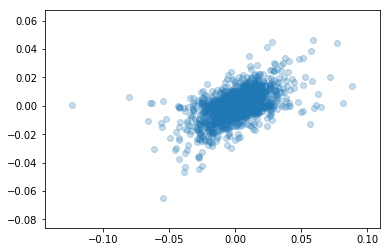

In [17]:
plt.scatter(aapl['Daily Return'], spy_etf['Daily Return'], alpha = 0.25)

In [18]:
beta, alpha, r_value, p_value, std_eror = stats.linregress(aapl['Daily Return'].iloc[1:], spy_etf['Daily Return'].iloc[1:])

In [19]:
beta

0.3256447440862882

In [20]:
alpha

0.00013744006577028154

In [21]:
r_value

0.5555914696345488

In [22]:
std_eror

0.011180228333511412

In [23]:
spy_etf['Daily Return'].head()

Date
2010-01-04         NaN
2010-01-05    0.002647
2010-01-06    0.000704
2010-01-07    0.004221
2010-01-08    0.003328
Name: Daily Return, dtype: float64

In [24]:
import numpy as np

In [25]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [32]:
fake_stock = spy_etf['Daily Return'].iloc[1:] + noise

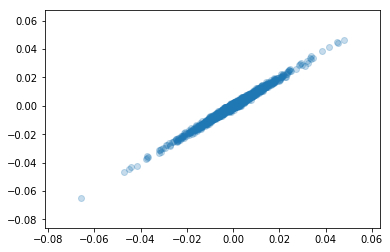

In [34]:
plt.scatter(fake_stock, spy_etf['Daily Return'].iloc[1:], alpha = 0.25)

In [35]:
beta, alpha, r_value, p_value, std_err = stats.linregress(fake_stock, spy_etf['Daily Return'][1:])

In [36]:
beta

0.9845898981530177

In [37]:
alpha

5.88658561741695e-07

In [38]:
r_value

0.9944593933694428

In [39]:
p_value

0.0